In [15]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import matplotlib.pyplot as plt

import os
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver


In [51]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)[0][['Symbol','GICS Sector', 'GICS Sub Industry']]
sp.nunique()
sp_more = sp[sp['Symbol'].isin(my_dict.keys())]


In [1]:
import pandas as pd
import pickle
with open("my_data.pkl", 'rb') as picklefile: 
    my_dict= pickle.load(picklefile)
with open("earnings_dates.pkl", 'rb') as picklefile: 
    dates= pickle.load(picklefile)
with open("filt.pkl", 'rb') as picklefile: 
    filt= pickle.load(picklefile)    

In [2]:
import warnings
from collections import OrderedDict
from pathlib import Path

import numpy as np
import pandas as pd

# Visualization
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import pyLDAvis
from pyLDAvis.sklearn import prepare

from wordcloud import WordCloud
from termcolor import colored

# spacy for language processing
import spacy

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

# gensim for alternative models
from gensim.models import LdaModel, LdaMulticore
from gensim.corpora import Dictionary
from gensim.matutils import Sparse2Corpus

/Users/gimdong-geon/python3_cooking/lib/python3.7/site-packages/thinc/neural/train.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, linear_decay
/Users/gimdong-geon/python3_cooking/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
/Users/gimdong-geon/python3_cooking/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
/Users/gimdong-geon/python3_cooking

In [31]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14.0, 8.7)
pyLDAvis.enable_notebook()
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [32]:
vectorizer = CountVectorizer(max_df=0.25, min_df=0.01,stop_words='english',ngram_range=(1,2))
doc_term_matrix = vectorizer.fit_transform(my_dict.values())
vocab_cnt = pd.Series(vectorizer.vocabulary_)
#vocab_cnt_adj = vocab_cnt.drop('uld')
vocab_cnt.sort_values(ascending=False)

zero                   7065
younger                7064
young                  7063
york city              7062
york                   7061
yields                 7060
yielding               7059
yielded                7058
yield                  7057
yesterday press        7056
yesterday earnings     7055
yesterday afternoon    7054
yesterday              7053
yes                    7052
years ve               7051
years come             7050
years ahead            7049
years ago              7048
year versus            7047
year ve                7046
year total             7045
year time              7044
year strong            7043
year sequentially      7042
year saw               7041
year sales             7040
year row               7039
year revenue           7038
year results           7037
year result            7036
                       ... 
10 increase              29
10 forward               28
10 form                  27
10 fiscal                26
10 filings          

In [33]:
lda_base = LatentDirichletAllocation(n_components=11,
                                     learning_method='batch',
                                     max_iter=10)
lda_base.fit(doc_term_matrix )

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=11, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [69]:
joblib.dump(lda_base, 'lda_1_iter.pkl')
lda_base = joblib.load('lda_1_iter.pkl') 
lda_base

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=11, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [35]:
# pseudo counts
topics_count = lda_base.components_
print(topics_count.shape)
topics_count[:10]

(11, 7066)


array([[ 0.09091409, 84.18110985, 26.09090777, ...,  1.80188224,
         0.09091014,  0.09091678],
       [11.53020711, 31.7201742 ,  0.09090928, ...,  0.09091159,
         0.09091331,  2.84117593],
       [ 0.09090909,  4.25451374,  0.09090909, ...,  4.99895761,
         0.09091439,  1.09090924],
       ...,
       [ 4.46366158,  2.69866923,  0.09090909, ...,  2.75993746,
         0.09091624,  2.26308821],
       [ 0.09090998,  5.01535351,  0.09090909, ...,  0.09091133,
         0.09166079,  0.09090909],
       [ 8.11453791, 19.99956716,  0.09090909, ...,  0.75915943,
         0.09092051,  0.09091139]])

In [36]:

n_components = 11
topic_labels = ['Topic {}'.format(i) for i in range(1, n_components+1)]
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1, 1)
topics = pd.DataFrame(topics_prob.T,
                      index=vectorizer.vocabulary_.keys(),
                     columns=topic_labels)
topics

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
bruce,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
director,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mike,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
nick,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
formal,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
presentations,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
accompanying,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
heading,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
dates,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
upcoming,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [37]:

# all words have positive probability for all topics
topics[topics.gt(0).all(1)].shape[0] == topics.shape[0]

True

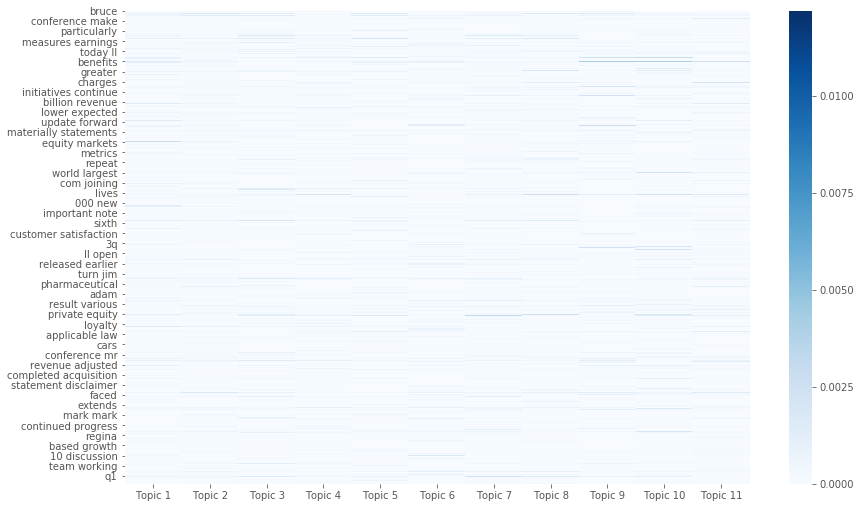

In [38]:
sns.heatmap(topics, cmap='Blues');

In [67]:
list( enumerate(topics.items()))[0]

(0, ('Topic 1', bruce                 0.00
  director              0.00
  mike                  0.00
  nick                  0.00
  formal                0.00
  presentations         0.00
  accompanying          0.00
  heading               0.00
  dates                 0.00
  upcoming              0.00
  hosting               0.00
  headquarters          0.00
  st                    0.00
  paul                  0.00
  weeks                 0.00
  evening               0.00
  november              0.00
  highlighting          0.00
  science               0.00
  advancing             0.00
  priority              0.00
  program               0.00
  thursday              0.00
  15                    0.00
  preview               0.00
  event                 0.00
  responded             0.00
  right                 0.00
  away                  0.00
  q4                    0.00
                        ... 
  today actual          0.00
  davis                 0.00
  consistent past       0.00


In [39]:
top_words = {}
for topic, words_ in topics.items():
    top_words[topic] = words_.nlargest(10).index.tolist()
pd.DataFrame(top_words)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,mobility,net impact,net impact,actual outcomes,hours,faced,dividend share,market strategy,campaign,storm,stand
1,government,oil production,accordance,headlines,unit,selling prices,affiliate,oil production,look forward,looking future,headlines
2,director,want share,uk,investment grade,shipment,standing,mentioned today,like point,descriptions,currency headwinds,funded
3,growth profitability,streamlined,states,remind conference,streamlined,taking time,comparable sales,reflected,having,having,launching
4,2018 net,year saw,continues deliver,orders quarter,net impact,announced increase,gaap reconciliation,ahead mr,convert,upgrades,supplier
5,addition refer,detailed review,eric,expect achieve,oil production,remind conference,higher quarter,end september,settlements,linked,ahead mr
6,repurchase program,accordance,market strategy,reflected,uk,speaks,billion reflecting,105,launching,strategic goals,strategy deliver
7,primarily higher,growth 15,dividend share,accordance,modestly,conditions,net impact,stock based,currency headwinds,stand,rate growth
8,settlements,turn chris,estimates,midpoint,sustainability,extremely proud,living,associated,experiences,reaching,know
9,digit growth,increased 19,strategic goals,modern,answer session,generally,associated,measurements,applicable,selling prices,released earlier


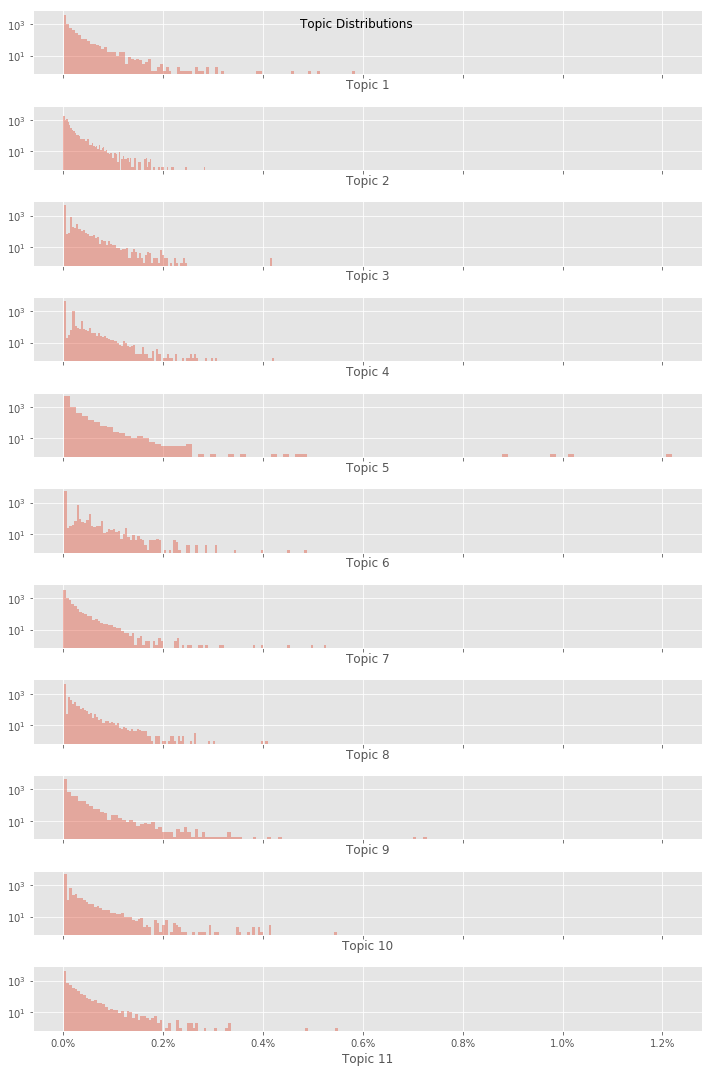

In [40]:
fig, axes = plt.subplots(nrows=11, sharey=True, sharex=True, figsize=(10, 15))
for i, (topic, prob) in enumerate(topics.items()):
    sns.distplot(prob, ax=axes[i], bins=100, kde=False, norm_hist=False)
    axes[i].set_yscale('log')
    axes[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
fig.suptitle('Topic Distributions')
fig.tight_layout()

In [41]:
train_preds = lda_base.transform(doc_term_matrix )
train_preds.shape

(481, 11)

In [54]:

train_eval = pd.DataFrame(train_preds, columns=topic_labels, index=sp_more['GICS Sector'])
train_eval

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
GICS Sector,,,,,,,,,,,
Industrials,0.21,0.59,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.00
Health Care,0.00,0.86,0.00,0.00,0.00,0.00,0.07,0.06,0.00,0.00,0.00
Health Care,0.15,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Health Care,0.00,0.89,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00
Information Technology,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Communication Services,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Information Technology,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
Information Technology,0.30,0.37,0.00,0.00,0.00,0.00,0.23,0.00,0.03,0.00,0.06
Consumer Discretionary,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [71]:
train_eval = pd.DataFrame(train_preds, columns=topic_labels, index=sp_more['GICS Sector'])
train_eval.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
GICS Sector,,,,,,,,,,,
Industrials,0.21,0.59,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.00
Health Care,0.00,0.86,0.00,0.00,0.00,0.00,0.07,0.06,0.00,0.00,0.00
Health Care,0.15,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Health Care,0.00,0.89,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00
Information Technology,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


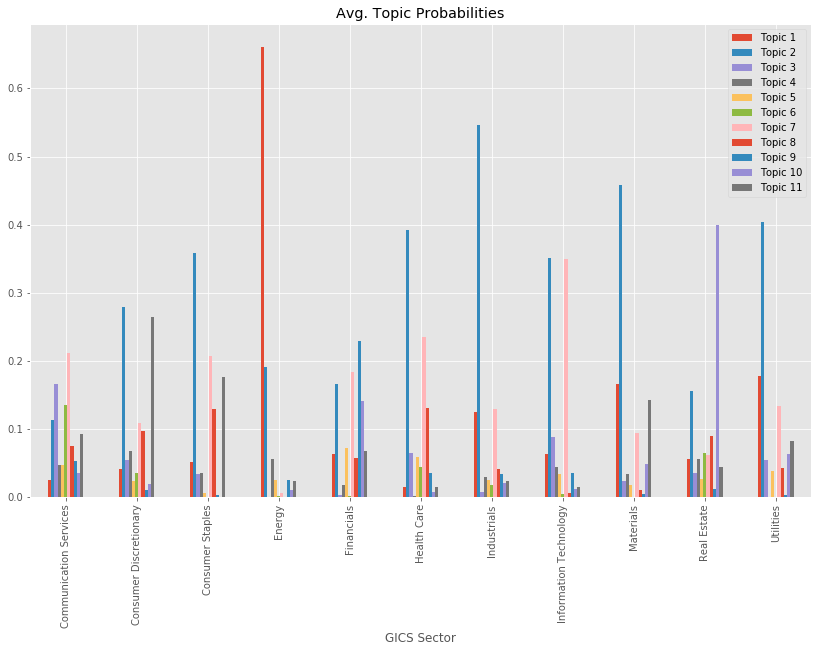

In [73]:
train_eval.groupby(level='GICS Sector').mean().plot.bar(title='Avg. Topic Probabilities');

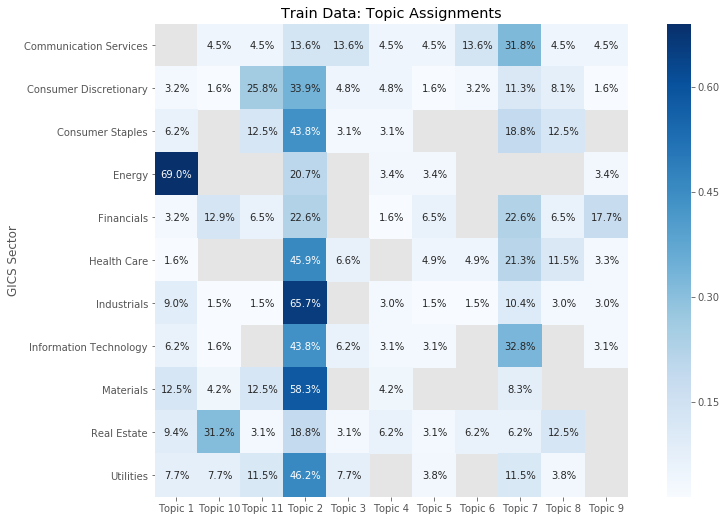

In [74]:
df = train_eval.groupby(level='GICS Sector').idxmax(
    axis=1).reset_index(-1, drop=True)
sns.heatmap(df.groupby(level='GICS Sector').value_counts(normalize=True)
            .unstack(-1), annot=True, fmt='.1%', cmap='Blues', square=True)
plt.title('Train Data: Topic Assignments');